# Assignment_4_Linear Regression(2)

In [ ]:
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model 
using R or Python.

In [2]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Acquire the data

In [3]:
ds = pd.read_csv('Salary_Data11.csv')
ds.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Preprocess the data

In [4]:
ds.shape

(30, 2)

In [5]:
ds.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
ds.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
ds.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='Salary', ylabel='Density'>

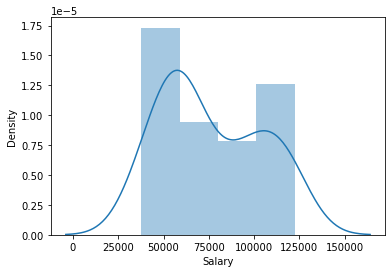

In [9]:
sns.distplot(ds['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

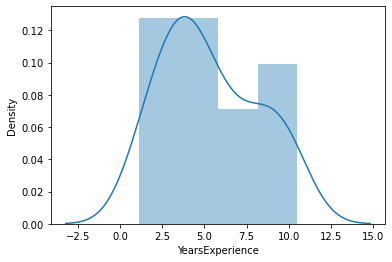

In [10]:
sns.distplot(ds['YearsExperience'])

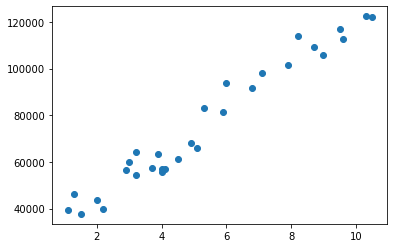

In [11]:
plt.scatter(ds['YearsExperience'],ds['Salary'])

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

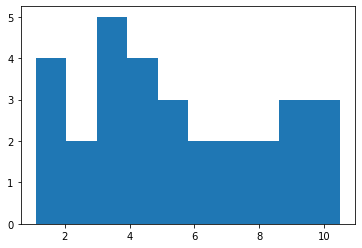

In [12]:
plt.hist(ds['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2412cfd5340>,
 'caps': [<matplotlib.lines.Line2D at 0x2412cfd5a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2412cfc6f70>],
 'medians': [<matplotlib.lines.Line2D at 0x2412cfe01c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2412cfe0550>],
 'means': []}

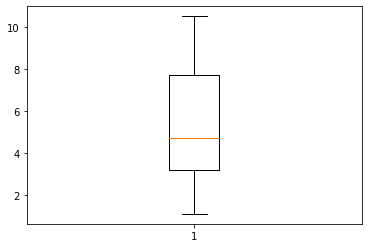

In [13]:
plt.boxplot(ds['YearsExperience'])

In [14]:
ds.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


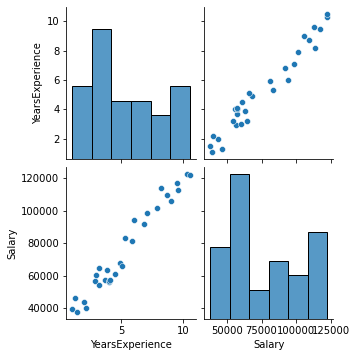

In [15]:
sns.pairplot(ds)

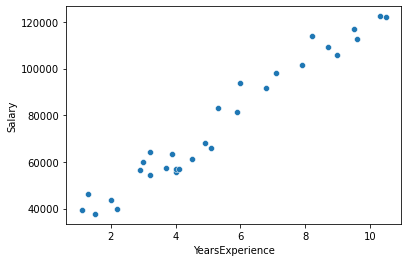

In [18]:
sns.scatterplot(x='YearsExperience', y='Salary',data=ds)
plt.show()

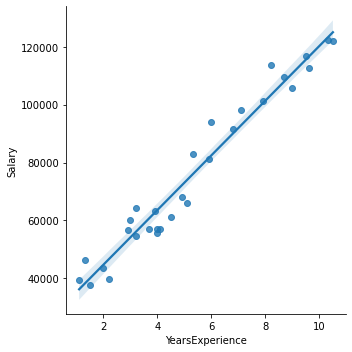

In [19]:
sns.lmplot(x='YearsExperience', y='Salary',data=ds)
plt.show()

In [20]:
ds.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
YearsExperience,0.37956,-1.012212
Salary,0.35412,-1.295421


# Train the data

In [21]:
x = ds[['YearsExperience']]
y = ds[['Salary']]

In [31]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [32]:
model = sm.OLS(y,x).fit()
prediction = model.predict(x)

# Test the Model

In [24]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(estimator=model, X=x, y=y, cv=4)
print("CV score is for LR model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score,cv_score.mean(),cv_score.std()))

CV score is for LR model = [ 0.53715907 -2.0533746   0.63386634  0.2211112 ]
 mean accuracy = -0.16530949821605145
 std dev  = 1.1007105559824064


In [25]:
print(" Intercept value of Model is " ,model.intercept_)
print("Coefficient value of Model is ", model.coef_)

 Intercept value of Model is  [25792.20019867]
Coefficient value of Model is  [[9449.96232146]]


In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [33]:
print("R2 score : %.2f" % r2_score(y,prediction))

R2 score : 0.76


In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    2.56e-24
Time:                        20:46:46   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logrithm Transformation

In [56]:
X_log = np.log(ds['YearsExperience'].values.reshape(-1,1))

y_log = ds['Salary'].values.reshape(-1,1)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [59]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [60]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [16808.04207062]
Co-efficient Value of Log Model is :  [[39297.91674992]]


In [61]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[105690.62002247],
       [ 79261.67485733],
       [ 99496.13089578],
       [ 82345.44586818],
       [ 62517.44576196],
       [ 68222.79629842]])

In [62]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,112635.0,105690.620022
1,67938.0,79261.674857
2,113812.0,99496.130896
3,83088.0,82345.445868
4,64445.0,62517.445762
5,57189.0,68222.796298


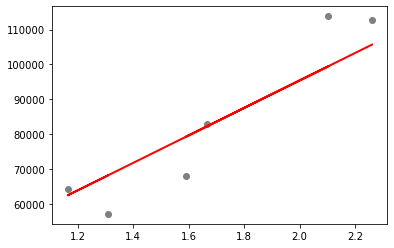

In [63]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

In [64]:
from sklearn import metrics

In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, l_model))

Mean Absolute Error: 7714.638101223965
Mean Squared Error: 84567607.74831854
Root Mean Squared Error: 9196.064796874723
R^2 Score :           0.8344395471211845


# Exponential Transformation Model

In [67]:
# Input dataset
X_e_log = ds['YearsExperience'].values.reshape(-1,1)

# Output or Predicted Value of data
y_e_log = np.log(ds['Salary'].values.reshape(-1,1))

In [68]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, y_e_log, test_size=0.2, random_state= 42)

In [69]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [70]:
print(" Exponent Model Intercept value is ", exp_model.intercept_)
print(" Exponent model Coefficient value is ", exp_model.coef_)

 Exponent Model Intercept value is  [10.48525073]
 Exponent model Coefficient value is  [[0.12704681]]


In [71]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[11.70490014],
       [11.10778012],
       [11.5270346 ],
       [11.15859884],
       [10.89180053],
       [10.95532394]])

In [72]:
pmsh_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
pmsh_exp

,Actual,Predict
0,11.631908,11.704900
1,11.126351,11.107780
2,11.642303,11.527035
3,11.327656,11.158599
4,11.073567,10.891801
5,10.954117,10.955324


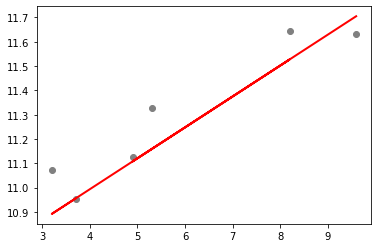

In [73]:
plt.scatter(X_test_exp, Y_test_exp,  color='gray')
plt.plot(X_test_exp, exp_model_pred, color='red', linewidth=2)
plt.show()

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_exp, exp_model_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_exp, exp_model_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_exp, exp_model_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_exp, exp_model_pred))

Mean Absolute Error: 0.09314373254401727
Mean Squared Error: 0.013430075287585596
Root Mean Squared Error: 0.11588820167551828
R^2 Score :           0.8120949075482874


# Quadratic Transformation Model

In [76]:
ds['Square_Y_Experience'] = ds.apply(lambda row: row.YearsExperience**2, axis =1 )

In [77]:
ds

,YearsExperience,Salary,Square_Y_Experience
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [78]:
X_q = ds.iloc[:,ds.columns != 'Salary']
Y_q = ds.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [79]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [80]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  27285.66834967611
                     Coefficient
YearsExperience      8497.965462
Square_Y_Experience    80.620847


In [81]:
y_pred_q_q = model.predict(X_test)

In [82]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
27,112635.0,116296.154089
15,67938.0,70861.405662
23,113812.0,102389.930923
17,83088.0,74589.524904
8,64445.0,55304.715307


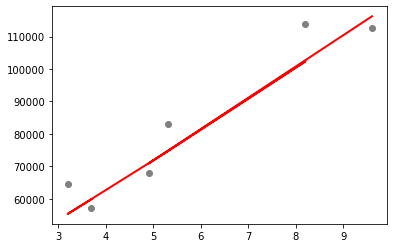

In [83]:
x_t =np.array(X_test)
plt.scatter(x_t[:,0], Y_test,  color='gray')
plt.plot(x_t[:,0], y_pred_q_q, color='red', linewidth=2)
plt.show()

In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_q_q))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_q_q) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q_q)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_q_q))

Mean Absolute Error: 6381.37142970219
Mean Squared Error: 52527916.36877489
Root Mean Squared Error: 7247.614529538315
R^2 Score :           0.8971645780890872


In [85]:
# Polynomial Transformation Model

In [86]:
ds['Cube_Y_Experience'] = ds.apply(lambda row: row.YearsExperience**3, axis =1 )
ds

,YearsExperience,Salary,Square_Y_Experience,Cube_Y_Experience
0,1.1,39343.0,1.21,1.331
1,1.3,46205.0,1.69,2.197
2,1.5,37731.0,2.25,3.375
3,2.0,43525.0,4.00,8.000
4,2.2,39891.0,4.84,10.648
5,2.9,56642.0,8.41,24.389
6,3.0,60150.0,9.00,27.000
7,3.2,54445.0,10.24,32.768
8,3.2,64445.0,10.24,32.768
9,3.7,57189.0,13.69,50.653


In [87]:
X_c = ds.iloc[:,ds.columns != 'Salary']
Y_c = ds.iloc[:,1]
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.2, random_state= 42)
print(Y_test)

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [88]:
cube_model = LinearRegression()
cube_model.fit(X_train_c, Y_train_c)

LinearRegression()

In [89]:
print(" Intercept value of Cubic Model is " ,cube_model.intercept_)

coeff_df = pd.DataFrame(cube_model.coef_, X_c.columns, columns=['Coefficient'])
print(coeff_df)

 Intercept value of Cubic Model is  39184.07247042661
                     Coefficient
YearsExperience     -1123.219163
Square_Y_Experience  2094.576996
Cube_Y_Experience    -118.359093


In [90]:
y_pred_cube = cube_model.predict(X_test_c)

In [91]:
df_33 = pd.DataFrame({'Actual':Y_test_c, 'Predicted': y_pred_cube})
df_33.head()

,Actual,Predicted
27,112635.0,116720.834043
15,67938.0,70046.263323
23,113812.0,105553.616210
17,83088.0,74446.732048
8,64445.0,53159.848830


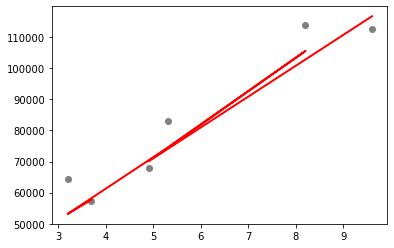

In [92]:
x_t_c =np.array(X_test_c)
plt.scatter(x_t_c[:,0], Y_test_c,  color='gray')
plt.plot(x_t_c[:,0], y_pred_cube, color='red', linewidth=2)
plt.show()

In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_c, y_pred_cube))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_c, y_pred_cube) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_c, y_pred_cube)))
print("R^2 Score :          ", metrics.r2_score(Y_test_c, y_pred_cube))

Mean Absolute Error: 5816.262964271623
Mean Squared Error: 48605815.331886984
Root Mean Squared Error: 6971.787097429682
R^2 Score :           0.904842988785487


## Log Transformation of X

In [34]:
x_logt = np.log(ds['YearsExperience'])

In [35]:
model2 = sm.OLS(y,x_logt).fit()
prediction2 = model2.predict(x_logt)

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    8.06e-26
Time:                        20:46:29   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation of Y

In [38]:
y_logt = np.log(ds['Salary'])

In [39]:
model3 = sm.OLS(y_logt,x).fit()
prediction3 = model3.predict(x)

In [40]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    6.09e-12
Time:                        20:53:15   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log transformation of x and y

In [41]:
model4 = sm.OLS(y_logt,x_logt).fit()
prediction4 = model4.predict(x_logt)

In [42]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    8.60e-15
Time:                        20:53:17   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## sqrt transformation of x

In [43]:
x_sqrt = np.sqrt(ds['YearsExperience'])

In [44]:
model5 = sm.OLS(y,x_sqrt).fit()
predict5 = model5.predict(x_sqrt)

In [45]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    3.62e-30
Time:                        20:53:24   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## sqrt transformation of y

In [46]:
y_sqrt = np.sqrt(ds['Salary'])

In [47]:
model6 = sm.OLS(y_sqrt,x).fit()
predict6 = model6.predict(x)

In [48]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    2.12e-16
Time:                        20:53:28   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## sqrt transformation of x and y

In [49]:
model7 = sm.OLS(y_sqrt,x_sqrt).fit()
predict7 = model7.predict(x_sqrt)

In [50]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    2.81e-29
Time:                        20:53:31   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model5.params

YearsExperience    34797.606845
dtype: float64

In [52]:
model5.pvalues , model5.rsquared , model5.rsquared_adj

(YearsExperience    3.621406e-30
 dtype: float64,
 0.9893615986697004,
 0.9889947572445177)

In [53]:
new_data= pd.Series([4.2,12])
new_data

0     4.2
1    12.0
dtype: float64

In [54]:
data_pred=pd.DataFrame(new_data,columns=['YearExperience'])
data_pred

,YearExperience
0,4.2
1,12.0


In [55]:
model5.predict(data_pred)

0    146149.948751
1    417571.282145
dtype: float64